# Deliverable 1 

## Personal Loan Classification Using Machine Learning Models: Decision Tree

<img src="image.jpg" alt="Title" width="600"/>

### Supervised Learning Problem Description
Example Bank is a US bank with a growing customer base primarily composed of depositors (liability customers). The bank aims to expand its small number of borrowers (asset customers) to increase its loan business and enhance revenue through loan interest. Specifically, management seeks strategies to convert liability customers into personal loan customers while maintaining their deposit relationships.

A successful campaign last year achieved a conversion rate of over 9% for liability customers, prompting the retail marketing department to develop more targeted marketing initiatives to improve this ratio. As a data scientist at Example Bank, your task is to build a model to help identify potential customers more likely to take out loans.

In [51]:
# imports
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Read data into a Pandas dataframe

In [52]:
data_path = 'Bank_Personal_Loan_Modelling.csv'
df=pd.read_csv(data_path)

Preview Data

In [53]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [54]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


Review basic data elements

In [55]:
# Display dataframe summary
print(f"Rows: {df.shape[0]}")  # Number of rows/observations
print(f"Columns: {df.shape[1]}")  # Number of columns
print("#" * 40)
print("Features:\n")
print(df.columns.tolist())  # List of column names


Rows: 5000
Columns: 14
########################################
Features:

['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


In [56]:
# Display missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Missing values:\n")
print(missing_values)

Missing values:

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


In [57]:
# Display percentage of missing values
missing_percentage = (df.isna().sum() / df.shape[0]) * 100
print("Percentage of missing values:\n")
print(missing_percentage.round(2))

Percentage of missing values:

ID                    0.0
Age                   0.0
Experience            0.0
Income                0.0
ZIP Code              0.0
Family                0.0
CCAvg                 0.0
Education             0.0
Mortgage              0.0
Personal Loan         0.0
Securities Account    0.0
CD Account            0.0
Online                0.0
CreditCard            0.0
dtype: float64


In [58]:
# Display unique values per column
unique_values = df.nunique()
print("Unique values per column:\n")
print(unique_values)

Unique values per column:

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


The dataset consists of 5,000 entries (RangeIndex: 0 to 4,999) and contains 14 columns. Below is a detailed summary of the dataset's structure:

- **Row Count**: 5,000
- **Column Count**: 14
- **Data Types**:
  - **Integer Columns (13)**: Includes features such as `ID`, `Age`, `Experience`, `Income`, `ZIP Code`, `Family`, `Education`, `Mortgage`, `Personal Loan`, `Securities Account`, `CD Account`, `Online`, and `CreditCard`.
  - **Float Columns (1)**: Includes the feature `CCAvg` (average credit card spending).

### Column Details:
1. **ID**: Unique identifier for each record (int64).
2. **Age**: Age of the individual (int64).
3. **Experience**: Years of professional experience (int64).
4. **Income**: Annual income in monetary units (int64).
5. **ZIP Code**: ZIP code of the individual's residence (int64).
6. **Family**: Size of the family (int64).
7. **CCAvg**: Average monthly credit card spending (float64).
8. **Education**: Level of education (1 = Undergrad, 2 = Graduate, 3 = Advanced/Professional) (int64).
9. **Mortgage**: Mortgage value (int64).
10. **Personal Loan**: Indicator if a personal loan is taken (1 = Yes, 0 = No) (int64).
11. **Securities Account**: Indicator for having a securities account (1 = Yes, 0 = No) (int64).
12. **CD Account**: Indicator for having a certificate of deposit account (1 = Yes, 0 = No) (int64).
13. **Online**: Indicator if the customer uses online banking services (1 = Yes, 0 = No) (int64).
14. **CreditCard**: Indicator if the customer has a credit card (1 = Yes, 0 = No) (int64).

### Memory Usage:
The dataset occupies approximately **547.0 KB** in memory.

This structure suggests a well-defined dataset with no missing values in any of the columns. The combination of numerical and categorical data types indicates its suitability for various analytical and predictive modeling tasks.

---

**The dataset is complete, with no missing values across any columns. All features are numerical in nature. The target variable for this analysis is Personal Loan, which indicates whether a personal loan has been taken (1 = Yes, 0 = No).**

---

### Data Preprocessing

Remove Id column as it is not needed.

In [60]:
df.drop(['ID'],axis=1,inplace=True) #droping id

Fix data types

In [61]:
df.columns = df.columns.str.replace(' ', '_')
category_col = ['Personal_Loan', 'Securities_Account','Family', 'CD_Account', 'Online', 'CreditCard', 'ZIP_Code', 'Education']
df[category_col] = df[category_col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIP_Code            5000 non-null   category
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(8), float64(1), int64(4)
memory usage: 260.1 KB


The dataset comprises **5,000 entries** (RangeIndex: 0 to 4,999) and includes **13 columns**. Below is a detailed summary of its structure:

### Data Overview:
- **Row Count**: 5,000  
- **Column Count**: 13  

### Data Types:
- **Categorical Columns (8)**: Represent discrete categories or groups.
- **Integer Columns (4)**: Represent continuous numerical data.
- **Float Columns (1)**: Represents continuous numerical data with decimal precision.  

### Column Details:
1. **Age** *(int64)*: Age of the individual.  
2. **Experience** *(int64)*: Years of professional experience.  
3. **Income** *(int64)*: Annual income in monetary units.  
4. **ZIP_Code** *(category)*: Categorical variable indicating the geographical region.  
5. **Family** *(category)*: Categorical variable representing family size.  
6. **CCAvg** *(float64)*: Average monthly credit card spending.  
7. **Education** *(category)*: Categorical variable indicating education level (1 = Undergraduate, 2 = Graduate, 3 = Advanced/Professional).  
8. **Mortgage** *(int64)*: Mortgage value in monetary units.  
9. **Personal_Loan** *(category)*: Target variable indicating whether a personal loan has been taken (1 = Yes, 0 = No).  
10. **Securities_Account** *(category)*: Indicates the presence of a securities account (1 = Yes, 0 = No).  
11. **CD_Account** *(category)*: Indicates the presence of a certificate of deposit account (1 = Yes, 0 = No).  
12. **Online** *(category)*: Indicates whether the customer uses online banking services (1 = Yes, 0 = No).  
13. **CreditCard** *(category)*: Indicates whether the customer owns a credit card (1 = Yes, 0 = No).  

### Memory Usage:
The dataset occupies approximately **260.1 KB** in memory, optimized due to the presence of categorical data types.  

In [62]:
import numpy as np
# fix incorrect data
df.loc[df['Experience']<0,'Experience']=np.abs(df['Experience'])

### Exploratory Data Analysis

In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


**Observations**

**Age:** Customer ages range from 23 to 67 years, with both the mean and median age approximately 45 years.

**Experience:** Professional experience varies from 0 to 43 years, with a mean and median of approximately 20 years. The maximum value of 43 years may warrant verification for accuracy.

**Income:** Annual incomes span from $8,000 to $224,000, with a mean of $73,000 and a median of $64,000. The maximum income value of $224,000 should be reviewed to ensure validity.

**Mortgage:** The maximum recorded mortgage value is $635,000, which may need further validation. The dataset does not provide summary statistics for average or median mortgage values.

**Credit Card Spending:** Average monthly credit card expenditures range from $1 to $10,000, with a mean of approximately $1,900 and a median of $1,500.

**Geographical Data:** A total of 1,095 customers are located in Los Angeles County.
Loan History: 480 customers have previously borrowed a loan.

#### Univariate Analysis


==================== Analyzing: Age ====================



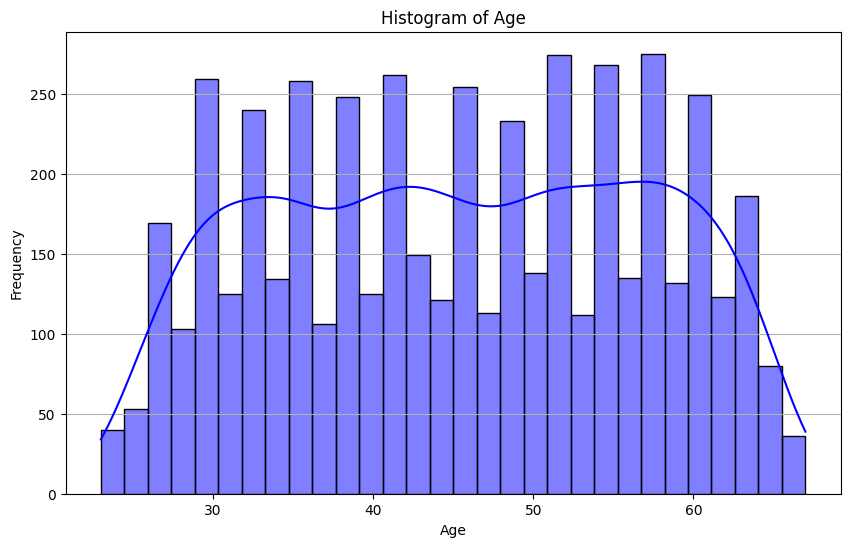

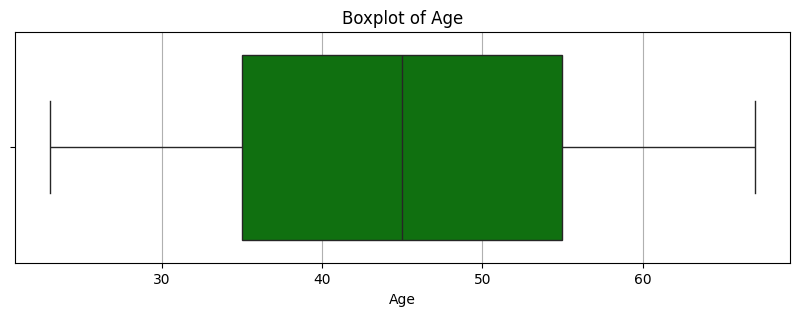


==================== Analyzing: Income ====================



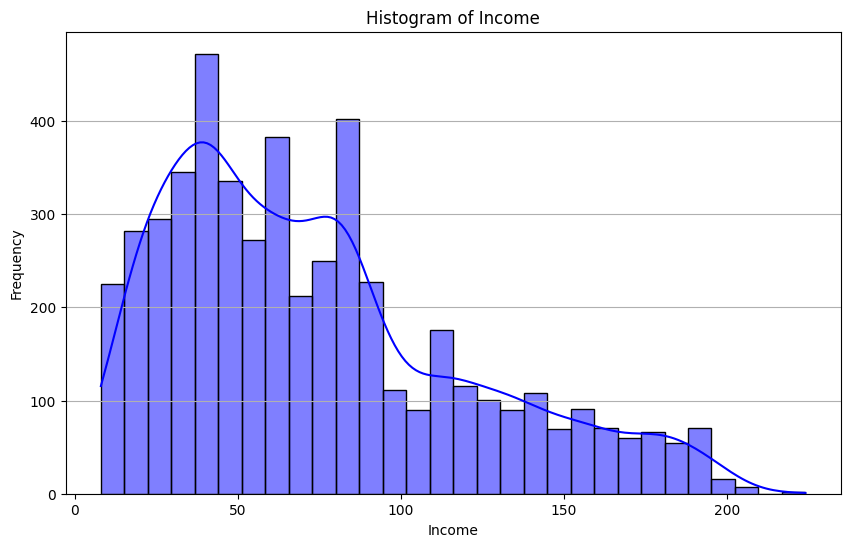

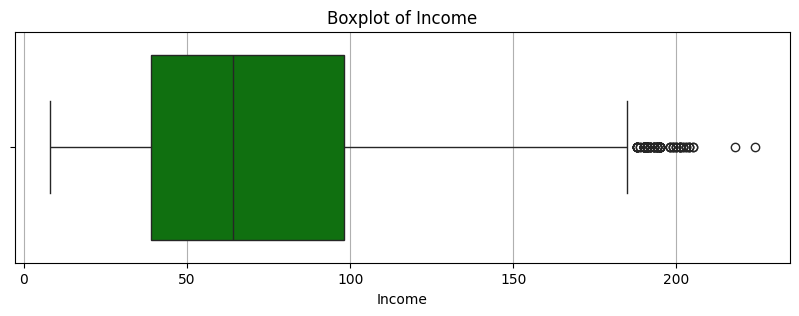


==================== Analyzing: Family ====================



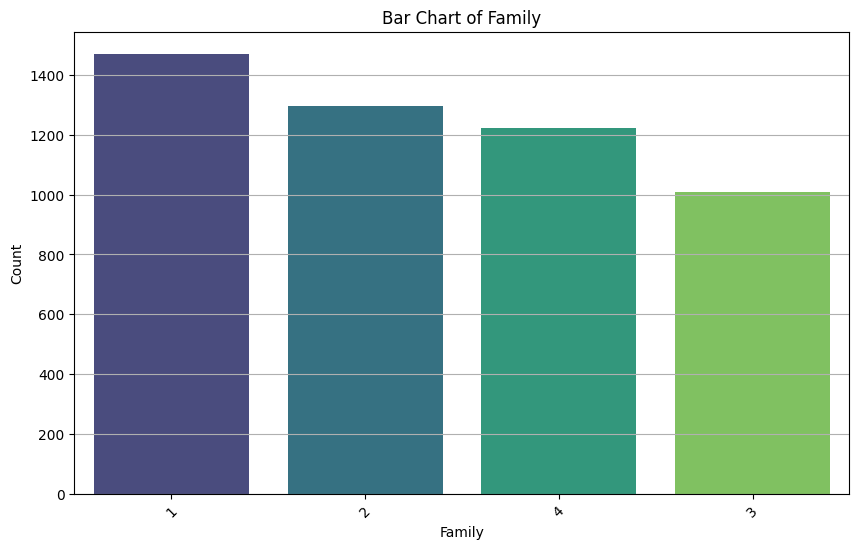

In [81]:
def univariate_analysis(df, columns):
    """
    Perform univariate analysis on specified columns of a pandas DataFrame.
    
    Parameters:
    - df: pandas DataFrame
    - columns: List of column names to analyze
    
    Returns:
    - None
    """
    for column in columns:
        print(f"\n{'='*20} Analyzing: {column} {'='*20}\n")
        
        # Check the data type of the column
        if pd.api.types.is_numeric_dtype(df[column]):
            # Numeric data
            # print(df[column].describe())
            
            # Plot histogram
            plt.figure(figsize=(10, 6))
            sns.histplot(df[column], kde=True, bins=30, color='blue', edgecolor='black')
            plt.title(f'Histogram of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.grid(axis='y')
            plt.show()
            
            # Boxplot
            plt.figure(figsize=(10, 3))
            sns.boxplot(x=df[column], color='green')
            plt.title(f'Boxplot of {column}')
            plt.xlabel(column)
            plt.grid(axis='x')
            plt.show()
        
        elif pd.api.types.is_categorical_dtype(df[column]) or pd.api.types.is_object_dtype(df[column]):
            # Categorical data
            # print(df[column].value_counts())
            
            # Plot bar chart
            plt.figure(figsize=(10, 6))
            sns.countplot(x=df[column], order=df[column].value_counts().index, palette='viridis')
            plt.title(f'Bar Chart of {column}')
            plt.xlabel(column)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.grid(axis='y')
            plt.show()
        
        else:
            print(f"The data type of {column} is not supported for univariate analysis.")

# Example Usage
# Assuming `df` is your DataFrame and you have a list of column names
columns_to_analyze = ['Age', 'Income', 'Family']
univariate_analysis(df, columns_to_analyze)


**Observations**

**Age and Experience:** Both variables exhibit similar distributions, characterized by spikes at intervals of 5 years, likely due to data rounding or grouping.

**Income:** The distribution of income is right-skewed, with a few high-value outliers that could distort the analysis. These outliers may be clipped or capped to reduce their impact.

**Average Monthly Credit Card Spending:** This variable is also right-skewed, with numerous high-value outliers. Clipping or capping these extreme values can help achieve a more balanced representation.

**Mortgage:** The majority of the values are zero, indicating that many customers do not have a mortgage. However, for non-zero values, the distribution is right-skewed with significant outliers on the higher side. These outliers could also benefit from clipping to enhance data reliability.

**Age**

In [68]:
# Creating age bins with meaningful labels
age_bins = [0, 30, 40, 50, 60, 100]
age_labels = ['18-30', '31-40', '41-50', '51-60', '61-100']

# Categorizing the 'Age' column into bins
df['AgeBin'] = pd.cut(
    df['Age'], 
    bins=age_bins, 
    labels=age_labels, 
    right=True  # Ensures the bin includes the right edge
)

# Displaying the first few rows to verify
print(df[['Age', 'AgeBin']].head())


   Age AgeBin
0   25  18-30
1   45  41-50
2   39  31-40
3   35  31-40
4   35  31-40


**Income**

In [69]:
# Defining income bins and labels
income_bins = [0, 50, 140, 224]  # Define income ranges
income_labels = ["Lower", "Middle", "High"]  # Assign labels to the bins

# Creating an 'Income_group' column based on the defined bins and labels
df["Income_group"] = pd.cut(
    x=df["Income"], 
    bins=income_bins, 
    labels=income_labels, 
    right=True,  # Include the right edge of each bin
    include_lowest=True  # Include the lowest value in the first bin
)

# Displaying the first few rows for verification
print(df[["Income", "Income_group"]].head())

   Income Income_group
0      49        Lower
1      34        Lower
2      11        Lower
3     100       Middle
4      45        Lower


**Spending**

In [71]:
# Defining bins and labels for credit card spending
spending_bins = [0, 0.7, 2.5, 10]  # Define spending ranges
spending_labels = ["Low", "Medium", "High"]  # Assign labels to the bins

# Categorizing the 'CCAvg' column into spending groups
df["Spending_group"] = pd.cut(
    x=df["CCAvg"], 
    bins=spending_bins, 
    labels=spending_labels, 
    include_lowest=True  # Include the lowest value in the first bin
)

# Displaying the first few rows for verification
print(df[["CCAvg", "Spending_group"]].head())


   CCAvg Spending_group
0    1.6         Medium
1    1.5         Medium
2    1.0         Medium
3    2.7           High
4    1.0         Medium


In [75]:
df

,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,AgeBin,Income_group,Spending_group
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,18-30,Lower,Medium
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,41-50,Lower,Medium
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,31-40,Lower,Medium
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,31-40,Middle,High
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,31-40,Lower,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0,18-30,Lower,Medium
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0,18-30,Lower,Low
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0,61-100,Lower,Low
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0,61-100,Lower,Low


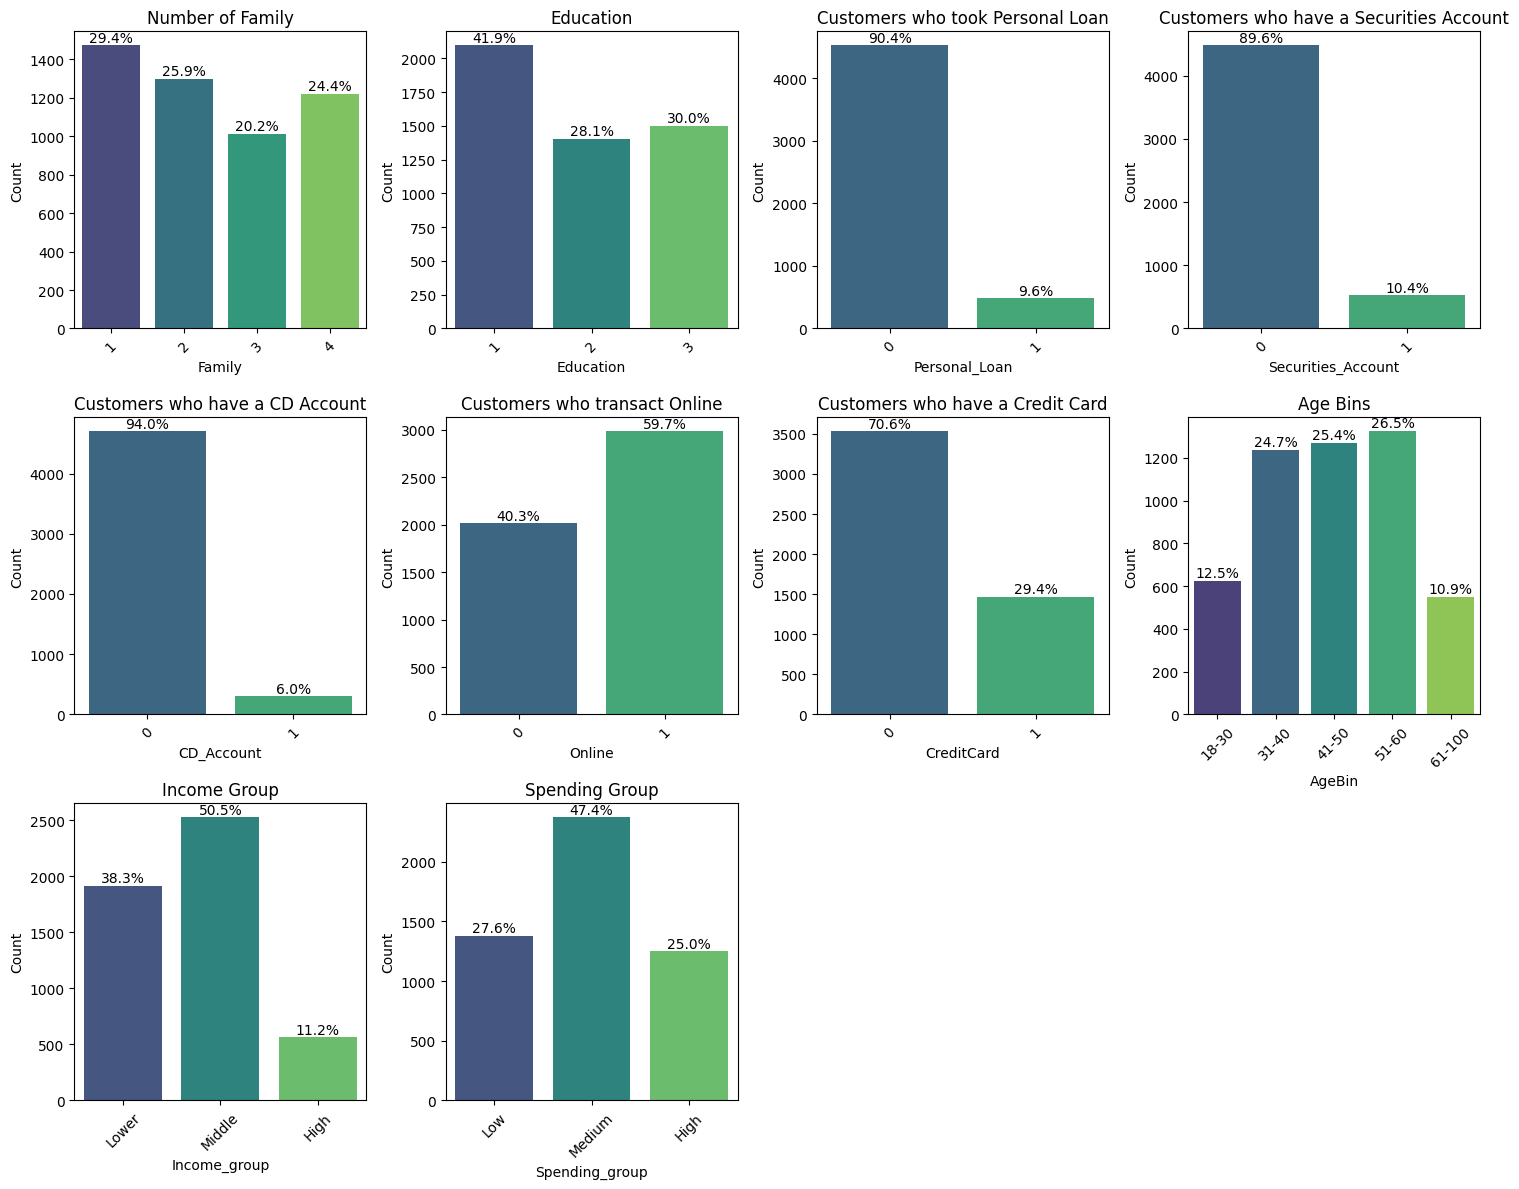

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns and their corresponding titles
cat_columns = ['Family', 'Education', 'Personal_Loan', 'Securities_Account',
               'CD_Account', 'Online', 'CreditCard', 'AgeBin', 'Income_group', 'Spending_group']

title = ['Number of Family', 'Education', 'Customers who took Personal Loan',
         'Customers who have a Securities Account', 'Customers who have a CD Account',
         'Customers who transact Online', 'Customers who have a Credit Card', 'Age Bins', 
         "Income Group", 'Spending Group']

# Set up the plot size
plt.figure(figsize=(15, 12))

# Loop over the categorical columns and their corresponding titles
for i, column in enumerate(cat_columns):
    plt.subplot(3, 4, i + 1)  # Create a 3x4 grid of subplots
    
    # Create a count plot for each categorical variable
    ax = sns.countplot(x=df[column], palette='viridis')
    
    # Set the title and labels
    plt.title(title[i], fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Count', fontsize=10)
    
    # Add percentage labels on top of each bar
    total = len(df[column])  # Total number of entries in the column
    for p in ax.patches:
        height = p.get_height()  # Get the height of each bar (count)
        percentage = (height / total) * 100  # Calculate percentage
        ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{percentage:.1f}%', 
                ha='center', va='bottom', fontsize=10)  # Display percentage at the top of the bar
    
    # Rotate x-axis labels for better readability (optional)
    plt.xticks(rotation=45)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


**Observations**

**Family:** The majority of customers have two members in their family (29.4%), followed by three members (25.9%) and one member (24.4%).

**Education:** A significant portion of customers have a bachelor's degree (41.9%), while 30.0% have a master's degree.

**Personal Loan:** A substantial 90.4% of customers have taken a personal loan.

**Securities Account:** A high percentage (89.6%) of customers hold a securities account.

**CD Account:** A large majority (94.0%) of customers have a CD account.

**Online Transactions:** A considerable number of customers transact online (59.7%).

**Credit Card:** A significant proportion (70.6%) of customers have a credit card.

**Age Bins:** The largest age group is 41-50 (29.4%), followed by 31-40 (26.5%) and 51-60 (24.7%).

**Income Group:** The majority of customers fall in the middle income group (50.5%), followed by the high income group (38.3%) and the low income group (11.2%).

**Spending Group:** The highest spending group is the medium group (47.4%), followed by the high group (27.6%) and the low group (25.0%).


#### Bivariate and Multivariate Analysis

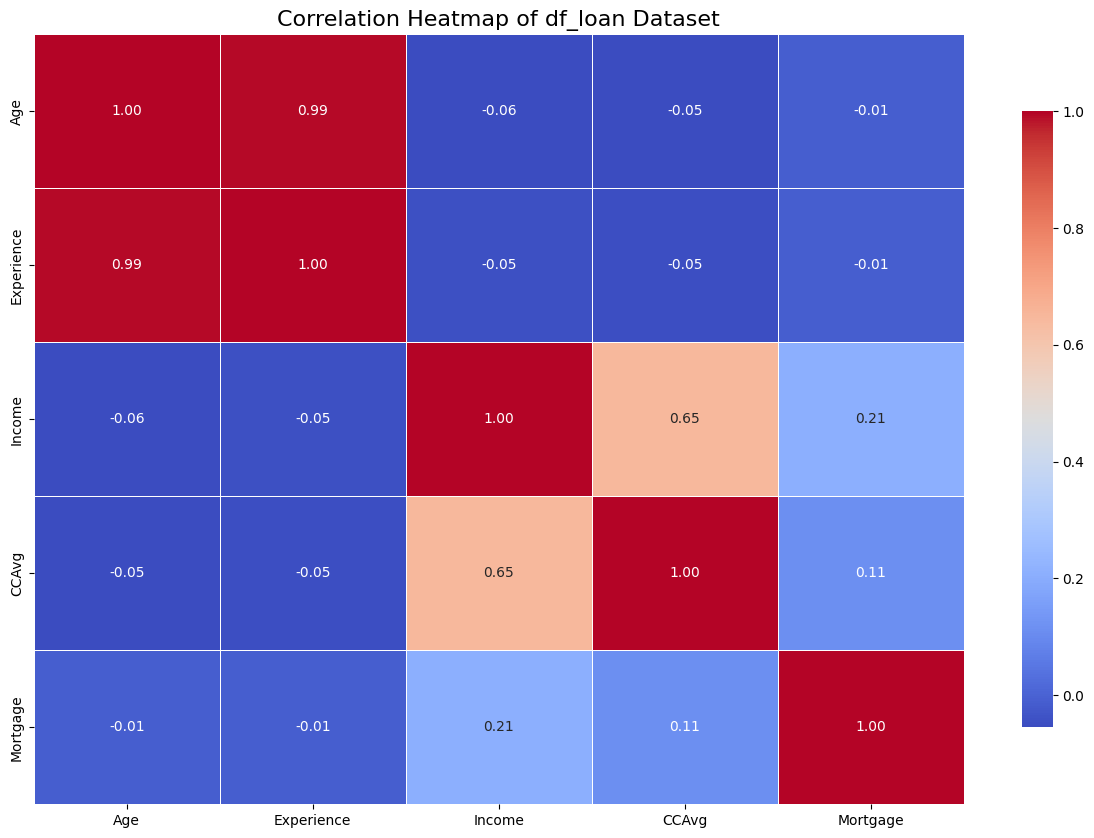

In [83]:
# Set a more refined color palette for the heatmap
sns.set_palette(sns.color_palette("Set2", 8))

# Create the heatmap with proper size and annotations
plt.figure(figsize=(15, 10))
sns.heatmap(
    df.corr(numeric_only=True),        # Compute correlation matrix
    annot=True,             # Display correlation values on the heatmap
    cmap="coolwarm",        # Set a color map for better visual differentiation
    fmt=".2f",              # Format the correlation values to two decimal places
    linewidths=0.5,         # Add lines between cells for better separation
    cbar_kws={'shrink': 0.8} # Adjust the color bar size
)

# Set the plot title
plt.title("Correlation Heatmap of df_loan Dataset", fontsize=16)

# Display the plot
plt.show()


**Observations**

**Strong Positive Correlation:** Age and Experience exhibit a very strong positive correlation (0.99), which is expected as experience generally increases with age.

**Moderate Positive Correlation:** Income and CCAvg (average credit card spending) have a moderate positive correlation (0.65), suggesting that individuals with higher incomes tend to spend more on credit cards.

**Weak Correlations:** Other pairs of variables show weak or negligible correlations, indicating limited linear relationships between them.

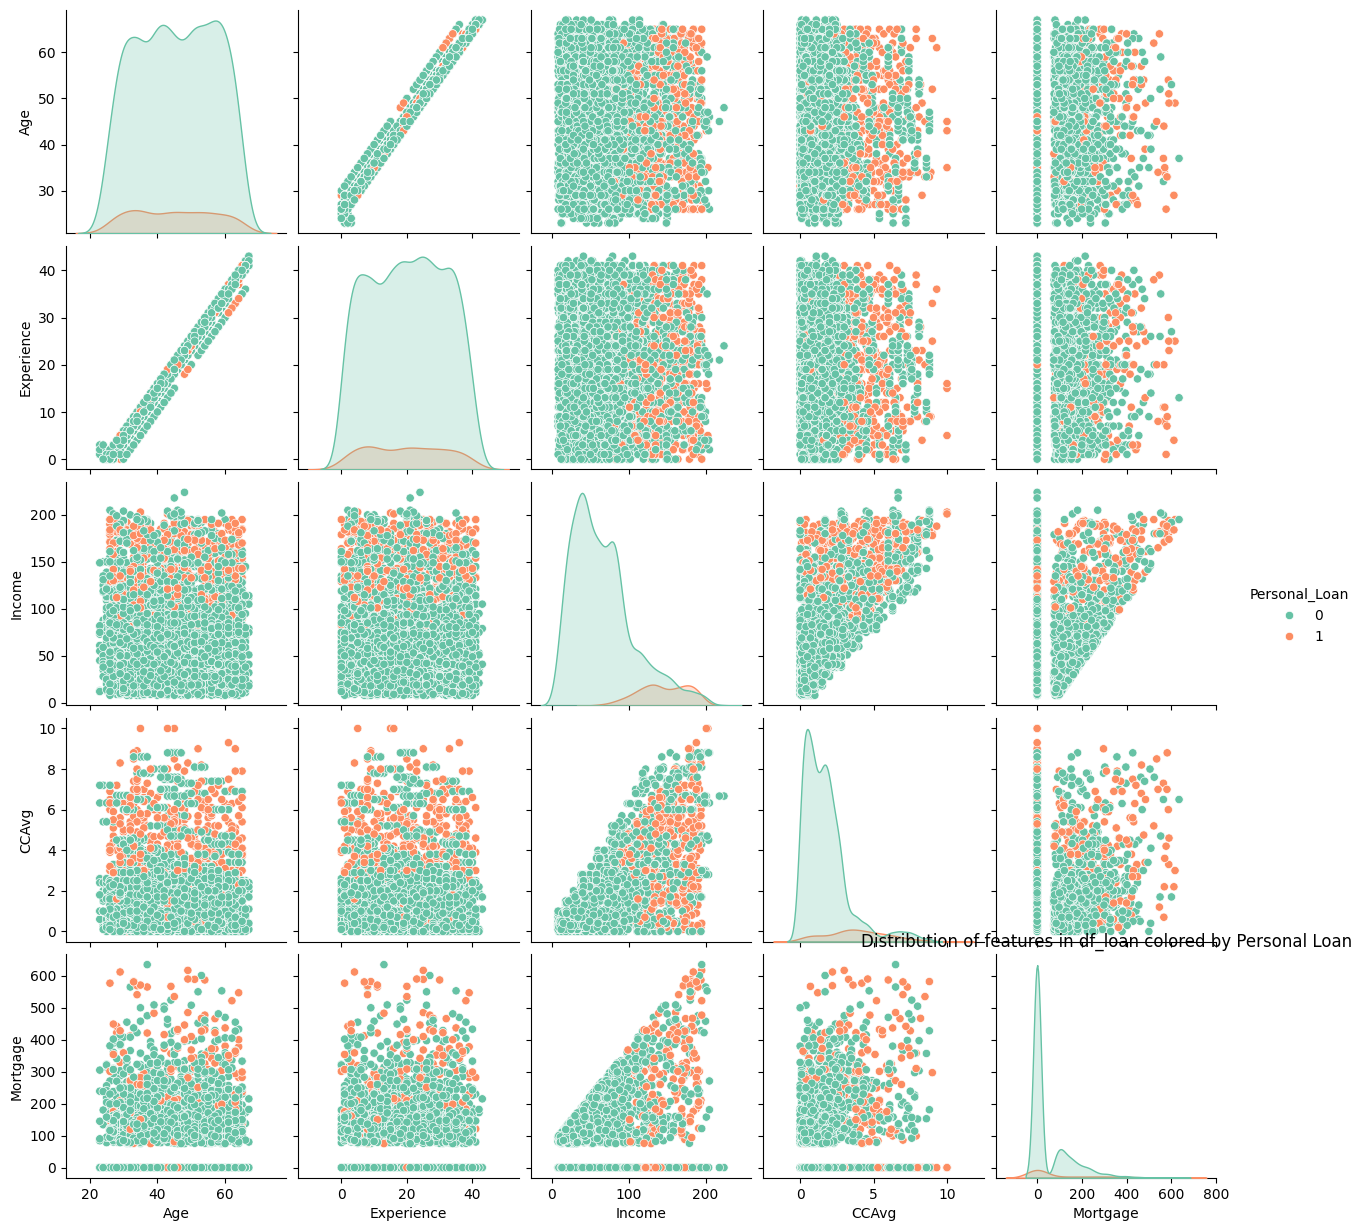

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette(sns.color_palette("Set2", 8))
sns.pairplot(df, hue="Personal_Loan", corner=False)

# Add a title and axis labels
plt.title("Distribution of features in df_loan colored by Personal Loan")
plt.xlabel("Features")
plt.ylabel("Value")

plt.show()

**Observations**

**Age and Experience:** There's a strong positive correlation between age and experience, as expected. The distribution of both variables appears to be similar for customers with and without personal loans.

**Income and CCAvg:** A positive correlation is observed between income and average credit card spending (CCAvg). Customers with higher incomes tend to have higher credit card spending. There seems to be a slight separation between customers with and without loans based on these variables, with customers with loans generally having higher income and CCAvg values.

**Mortgage:** The distribution of mortgage amounts appears to be similar for both groups. However, there's a subtle trend suggesting that customers with loans might have slightly lower mortgage amounts.

### Decision Tree (model building and training)

**Data Preparation**

In [103]:
df_modeling = df.copy()
df_modeling = df_modeling.drop(columns=["AgeBin",'Experience','Income_group','Spending_group', 'ZIP_Code'])

In [104]:
# Separate the features (X) and target variable (y) for modeling
X_dt = df_modeling.drop(columns=['Personal_Loan'])  # Features: Drop the target column
y_dt = df_modeling['Personal_Loan']  # Target variable: 'Personal_Loan'

**Split data into train and test set**

In [105]:
from sklearn.model_selection import train_test_split

# Identify categorical columns for one-hot encoding
oneHotCols = X_dt.select_dtypes(exclude='number').columns.to_list()

# Apply one-hot encoding to categorical columns and drop the first category to avoid multicollinearity
X_dt = pd.get_dummies(X_dt, columns=oneHotCols, drop_first=True)

# Split the dataset into training and testing sets
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(
    X_dt, 
    y_dt, 
    test_size=0.3,         # 30% of the data will be used for testing
    random_state=1,        # Ensure reproducibility of the split
    stratify=y_dt          # Maintain the same proportion of target variable in train/test sets
)

# Display the shape of the resulting datasets to verify
print("Training set features shape:", X_train_dt.shape)
print("Testing set features shape:", X_test_dt.shape)
print("Training set target shape:", y_train_dt.shape)
print("Testing set target shape:", y_test_dt.shape)

Training set features shape: (3500, 13)
Testing set features shape: (1500, 13)
Training set target shape: (3500,)
Testing set target shape: (1500,)


**Built a CART model on the train data**

In [106]:
from sklearn import metrics

def get_recall_score(model):
    """
    This function evaluates the given model by calculating accuracy and recall scores
    on both the training and test datasets, and visualizes the confusion matrix for each.
    
    Parameters:
    model : classifier 
        The model used to predict values of X.
    """
    
    # Make predictions on training and test datasets
    y_train_predict = model.predict(X_train_dt)
    y_test_predict = model.predict(X_test_dt)
    
    # Accuracy scores for training and test sets
    train_accuracy = model.score(X_train_dt, y_train_dt)
    test_accuracy = model.score(X_test_dt, y_test_dt)
    
    # Recall scores for training and test sets
    train_recall = metrics.recall_score(y_train_dt, y_train_predict)
    test_recall = metrics.recall_score(y_test_dt, y_test_predict)
    
    # Print accuracy and recall scores with formatting
    print(f"\033[1mAccuracy:\033[0m  Train: {train_accuracy:.4f}, Test: {test_accuracy:.4f}")
    print(f"\033[1mRecall:\033[0m  Train: {train_recall:.4f}, Test: {test_recall:.4f}")


In [107]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the DecisionTreeClassifier with Gini impurity, class weights, and a fixed random state
model = DecisionTreeClassifier(
    criterion='gini',               # Gini impurity criterion for splitting nodes
    class_weight={0: 0.15, 1: 0.85}, # Class weights to handle imbalanced classes
    random_state=1                  # Ensure reproducibility of results
)

# Fit the model to the training data
model.fit(X_train_dt, y_train_dt)

# Evaluate the model performance using recall score and confusion matrix
get_recall_score(model)

Accuracy:  Train: 1.0000, Test: 0.9787
Recall:  Train: 1.0000, Test: 0.8750


In [108]:
import sklearn.tree as tree

# Extract the feature names from the DataFrame
feature_names = list(X_dt.columns)

# Print the text representation of the decision tree
# This will display the tree structure with feature names and weights at each node
tree_representation = tree.export_text(
    model,                         # The trained decision tree model
    feature_names=feature_names,    # Feature names to be displayed in the tree
    show_weights=True               # Display feature importance (weights) at each node
)

# Print the decision tree structure
print("Decision Tree Structure:\n")
print(tree_representation)

Decision Tree Structure:

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [369.60, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 81.50
|   |   |   |--- Age <= 36.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- CCAvg <= 3.95
|   |   |   |   |   |   |--- weights: [0.00, 2.55] class: 1
|   |   |   |   |   |--- CCAvg >  3.95
|   |   |   |   |   |   |--- weights: [0.30, 0.00] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [1.65, 0.00] class: 0
|   |   |   |--- Age >  36.50
|   |   |   |   |--- Mortgage <= 41.50
|   |   |   |   |   |--- weights: [6.75, 0.00] class: 0
|   |   |   |   |--- Mortgage >  41.50
|   |   |   |   |   |--- weights: [2.40, 0.00] class: 0
|   |   |--- Income >  81.50
|   |   |   |--- CCAvg <= 4.40
|   |   |   |   |--- Age <= 46.00
|   |   |   |   |   |--- Income <= 90.50
|   |   |   |   |   |   |--- Online_1 <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.75, 0.00] class: 0
|   |  

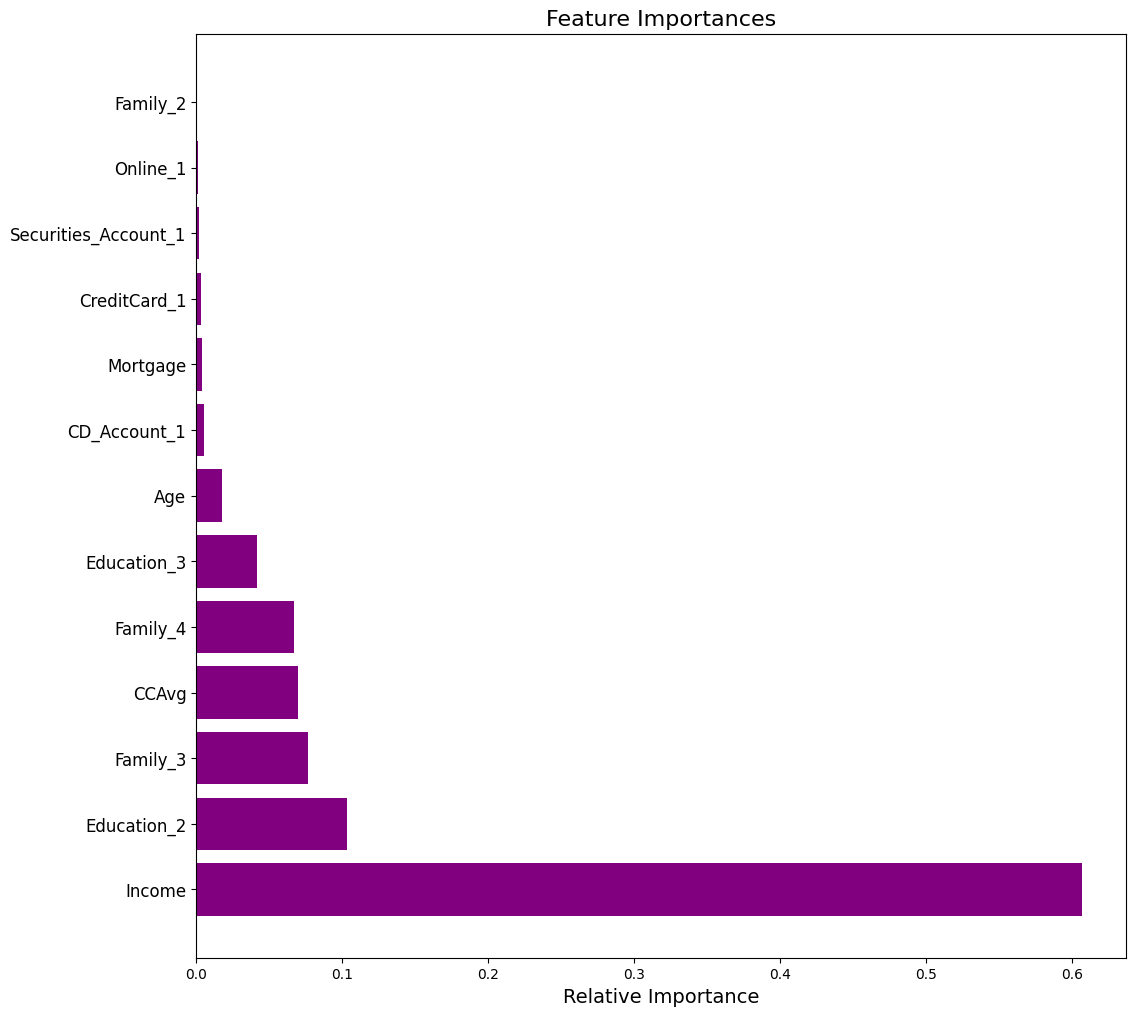

In [109]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the feature importances from the trained model
importances = model.feature_importances_

# Sort the features based on their importance values
indices = np.argsort(importances)[::-1]  # Sorting in descending order

# Plot the feature importances
plt.figure(figsize=(12, 12))  # Set the figure size for the plot
plt.title('Feature Importances', fontsize=16)  # Title with larger font size
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')  # Horizontal bar plot

# Set the y-tick labels to the feature names, ordered by importance
plt.yticks(range(len(indices)), [feature_names[i] for i in indices], fontsize=12)

# Label for the x-axis and set font size for readability
plt.xlabel('Relative Importance', fontsize=14)

# Display the plot
plt.show()


### Discussion and Conclusion

**1. Accuracy:**
- **Train Accuracy: 1.0000**: This means that the decision tree model is perfectly fitting the training data, correctly classifying all training instances. This is often an indicator of overfitting, where the model has learned the specific details of the training data too well, possibly at the expense of its ability to generalize.
- **Test Accuracy: 0.9787**: The model performs well on the unseen test data, correctly classifying approximately 97.87% of instances. This indicates that despite overfitting on the training data, the model still generalizes well to new data, although a slight drop from the training accuracy is observed, which is expected.

**2. Recall:**
- **Train Recall: 1.0000**: The recall on the training data is perfect, meaning the model is correctly identifying all positive cases (true positives) from the training set. This suggests that the model is very sensitive to detecting the target class on the training data.
- **Test Recall: 0.8750**: On the test data, the recall is 87.5%. This is still quite good, meaning that the model is identifying 87.5% of all actual positive instances in the test set. However, the decrease from 100% to 87.5% suggests that the model may be less sensitive in generalizing to new, unseen examples. The drop in recall indicates that some positive instances in the test set are being missed (false negatives).

### Conclusion:
- **Overfitting:** The model is likely overfitting the training data, given the perfect training accuracy and recall. This means it has learned the noise and details of the training set too well, which may lead to poor generalization to unseen data in some cases.
- **Model Generalization:** Despite overfitting, the model performs very well on the test set, with a high accuracy and a good recall rate, though the drop from training recall to test recall suggests room for improvement.
- **Actionable Insights:** 
   - **Tuning:** Consider pruning the decision tree or using cross-validation to optimize the tree's complexity and reduce overfitting.
   - **Evaluation:** It might be helpful to look at other evaluation metrics like **precision**, **F1-score**, or the **confusion matrix** to get a more comprehensive understanding of the model's performance, especially if you are concerned about the recall drop.
   - **Class Imbalance:** If the dataset is imbalanced, the recall score for the positive class might be impacted, so evaluating with techniques like **class weights** or **sampling methods** could also improve performance.